In [2]:
# Import required libraries
import numpy as np
from tqdm import tqdm
import concurrent.futures
import numba as nb
from matplotlib import pyplot as plt

In [14]:
# Set parameters for simulation
farm_population = 1
packer_population = 1
distributor_population = 1
retailer_population = 1
customer_population = 5000

plot_per_farm = 1856
plot_per_farm = 1856
box_per_P = 31562
box_per_D = 31562
box_per_R = 31562

box_per_plot = 17
contamination_rate = 0.06
number_plot = farm_population * plot_per_farm
number_box = number_plot * box_per_plot

D_test_rate = 0.0
R_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

iterations = 10

# Test cost at each stage
test_cost_F = 350
test_cost_P = 50
test_cost_D = 50
test_cost_R = 50

# Customer demand
box_cap = 50
customer_number = int(number_box * box_cap)
customer_demand = list(map(int, abs(np.random.normal(1, 2, customer_number))))
for i in range(len(customer_demand)):
    if customer_demand[i] == 0:
        customer_demand[i] = 1

# Customer illness cost
ill_rate = 0.04
hospital_rate = 0.0164
death_rate = 0.000041
ill_compensation = 719
hospital_compensation = 18438
death_compensation = 1764112

# Recall and Trace cost
unit_recall_labor_cost = 10
unit_trace_labor_cost = 10
price_per_box = 100

# Transportation cost
unit_trans_cost = 0.007
cost_indicator = 1
F_P_distance = 5
P_D_distance = 2983
D_R_distance = 11


In [246]:
# Define functions 

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask

def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    box_ids = (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()
    return box_ids

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)

    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n


    return remaining_boxes, contamination_mask, dropped_boxes

# Function to check if a value is in an array
#@nb.njit(parallel=True) 
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        if a[i] in b:
            out[i]=True
        else:
            out[i]=False
    return out

# Cost Calculation 
def 
FPDR_box_list = [box_ids, box_ids_F, box_ids_P, box_ids_D, box_ids_R]
trans_cost_list = [F_P_distance, P_D_distance, D_R_distance]
# Transportation cost
def transportation_cost(FPDR_box_list, trans_cost_list):
    
    






# Customer consumption and illness report 

def customer_consumption(box_ids, contamination_mask, farm_population, plot_per_farm, box_per_plot):
    
# Run testing and return the number of boxes dropped at each stage
def run_test(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate,
                   d_test_rate, r_test_rate, c_test_rate):
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)    
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask, dropped_boxes_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask, dropped_boxes_P = run_stage(box_ids_F, contamination_mask, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask, dropped_boxes_D = run_stage(box_ids_P, contamination_mask, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask, dropped_boxes_R = run_stage(box_ids_D, contamination_mask, r_test_rate,box_per_plot)
    box_ids_C, contamination_mask, dropped_boxes_C = run_stage(box_ids_R, contamination_mask, c_test_rate,box_per_plot)
    return box_ids, box_ids_F_P, box_ids_P_D, box_ids_D_R, box_ids_R_C, box_ids_C, contamination_mask, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C


In [3]:
box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = run_simulation(100, 2500, 20, 0.05, 0.01, 0.04, 0.05, 0.01, 0.02)
print(len(box_ids))
print(len(box_ids_C))
print(len(dropped_boxes_F))
print(len(dropped_boxes_P))
print(len(dropped_boxes_D))
print(len(dropped_boxes_R))
print(len(dropped_boxes_C))
print(len(box_ids)-len(box_ids_C))
print(sum([len(dropped_boxes_F), len(dropped_boxes_P), len(dropped_boxes_D), len(dropped_boxes_R), len(dropped_boxes_C), box_ids_C.shape[0]]))

5000000
4969144
2420
9968
11651
2317
4500
30856
5000000


100%|██████████| 59/59 [00:00<00:00, 636.90it/s]


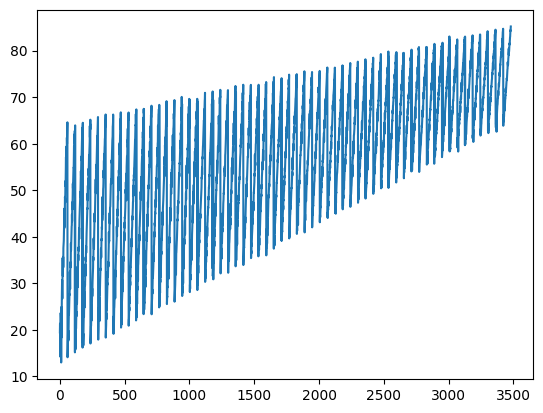

In [6]:

farm_population = 100
plot_per_farm = 50
box_per_plot = 50
contamination_rate = 0.06

d_test_rate = 0.0
r_test_rate = 0.0
c_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

for f_test_rate in tqdm(np.arange(0.01,0.6,0.01)):
    for p_test_rate in np.arange(0.01,0.6,0.01):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)


def run_simulation_wrapper(args):
    f_test_rate, p_test_rate = args
    return run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = []
    for f_test_rate in tqdm(np.arange(0.0,1,0.1)):
        for p_test_rate in np.arange(0.01,0.5,0.01):
            results.append(executor.submit(run_simulation_wrapper, (f_test_rate, p_test_rate)))

    for future in concurrent.futures.as_completed(results):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = future.result()
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)

plt.plot(detection_percent_l)
plt.show()


In [7]:
# Define functions 
# Only contaminated box is removed after testing at each stage
import numpy as np
from tqdm import tqdm
import concurrent.futures
import numba as nb

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask

# define testing at each stage
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes

#@nb.njit(parallel=True) 
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        if a[i] in b:
            out[i]=True
        else:
            out[i]=False
    return out

# Run simulation
def run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate,
                   d_test_rate, r_test_rate, c_test_rate):
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = np.array([generate_box_id(farm_idx, plot_idx, box_idx)
                        for farm_idx in range(1,farm_population+1)
                        for plot_idx in range(1,plot_per_farm+1)
                        for box_idx in range(1,box_per_plot+1)])
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)

    box_ids_F, contamination_mask, dropped_boxes_F = run_stage(box_ids, contamination_mask, f_test_rate)
    box_ids_P, contamination_mask, dropped_boxes_P = run_stage(box_ids_F, contamination_mask, p_test_rate)
    box_ids_D, contamination_mask, dropped_boxes_D = run_stage(box_ids_P, contamination_mask, d_test_rate)
    box_ids_R, contamination_mask, dropped_boxes_R = run_stage(box_ids_D, contamination_mask, r_test_rate)
    box_ids_C, contamination_mask, dropped_boxes_C = run_stage(box_ids_R, contamination_mask, c_test_rate)

    return box_ids, box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C


100%|██████████| 59/59 [00:00<00:00, 1941.82it/s]


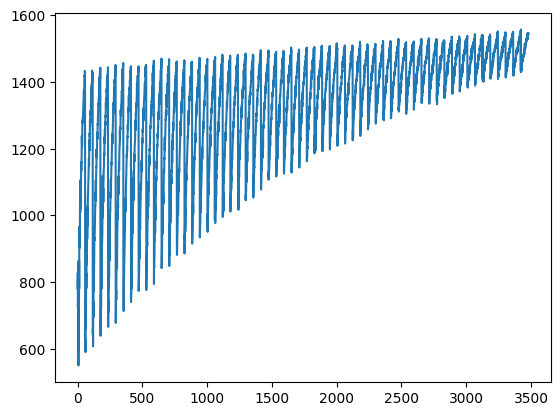

In [247]:
from tqdm import tqdm
import concurrent.futures
from matplotlib import pyplot as plt
farm_population = 100
plot_per_farm = 50
box_per_plot = 50
contamination_rate = 0.06

d_test_rate = 0.03
r_test_rate = 0.04
c_test_rate = 0.05

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

def run_simulation_wrapper(args):
    f_test_rate, p_test_rate = args
    return run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = []
    for f_test_rate in tqdm(np.arange(0.01,0.6,0.01)):
        for p_test_rate in np.arange(0.01,0.6,0.01):
            results.append(executor.submit(run_simulation_wrapper, (f_test_rate, p_test_rate)))

    for future in concurrent.futures.as_completed(results):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = future.result()
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)

plt.plot(detection_percent_l)
plt.show()
